In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# confusion_matrix
from sklearn.metrics import confusion_matrix
# precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support
from sklearn.decomposition import PCA

In [3]:
def model_report(Y_test, Y_pred_rf):
    accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
    conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
    classification_rep = classification_report(Y_test, Y_pred_rf, zero_division=1)
    print(f"Model Accuracy: {accuracy_rf}")
    print("Confusion Matrix:")
    print(conf_matrix_rf)
    print("Classification Report:")
    print(classification_rep)

In [4]:
def model_confusion_matrix_heatmap(Y_test, Y_pred_rf):
    conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
    sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Random Forest Confusion Matrix')
    plt.show()

In [5]:
# remove outlier based on every column
def IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + IQR*1.5
    lower_fence = Q1 - IQR*1.5
    return upper_fence,lower_fence
def no_outlier(df):
    upper_fence, lower_fence = IQR(df)
    ddf=df[(df>lower_fence)&(df<upper_fence)]
    return ddf

In [6]:
def prfs(Y_test, Y_pred_rf):
    precision, recall, fscore, support = precision_recall_fscore_support(Y_test, Y_pred_rf, average='weighted', zero_division=1)
    print(f"precision: {precision}")
    print(f"recall: {recall}")
    print(f"fscore: {fscore}")
    print(f"support: {support}")

In [7]:
data = pd.read_csv("./StressLevelDataset.csv")

In [8]:
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [10]:
X = data.drop(['stress_level'], axis =1)
Y = data['stress_level']

# Split the Data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(x_train.shape)
print(x_test.shape)

(880, 20)
(220, 20)


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [12]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)
model_report(y_test, rf_classifier.predict(x_test))

Model Accuracy: 0.8727272727272727
Confusion Matrix:
[[68  4  4]
 [ 6 63  4]
 [ 7  3 61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        76
           1       0.90      0.86      0.88        73
           2       0.88      0.86      0.87        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



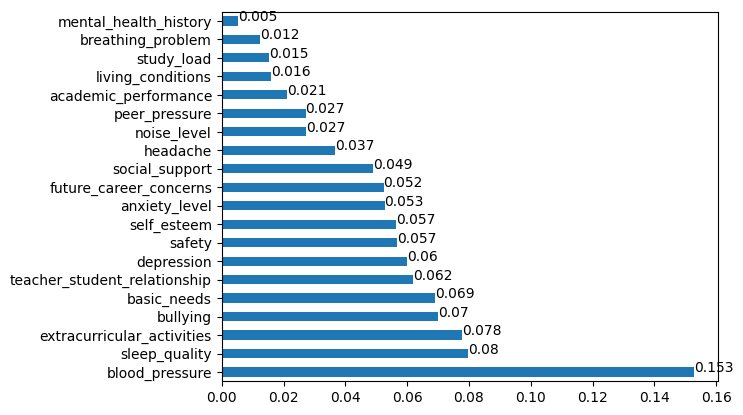

In [13]:
feat_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
# draw number on the bar
for index, value in enumerate(feat_importances.nlargest(20)):
    plt.text(value, index, str(round(value,3)))
plt.show()

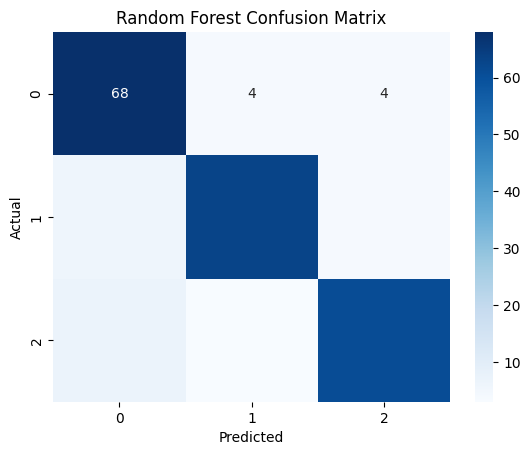

In [14]:
model_confusion_matrix_heatmap(y_test, rf_classifier.predict(x_test))

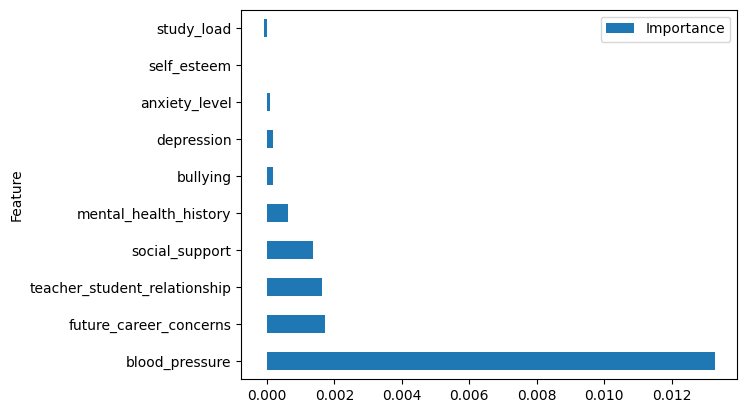

In [15]:
result = permutation_importance(rf_classifier, X, Y, n_repeats=10, random_state=0)
#feature_importance = dict(zip(X.columns, result.importances_mean))
permutation_importance_result = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
permutation_importance_result.sort_values(by='Importance', ascending=False)
# draw graph of feature importances for better visualization
permutation_importance_result.sort_values(by='Importance', ascending=False).head(10).plot(kind='barh', x='Feature', y='Importance')
plt.show()


In [16]:
data['stress_level'].value_counts()

stress_level
0    373
2    369
1    358
Name: count, dtype: int64

In [17]:
imp = pd.DataFrame(feat_importances, columns=['importance'])
imp = imp[imp['importance'] > 0.04]
imp

,importance
anxiety_level,0.052693
self_esteem,0.056522
depression,0.059951
blood_pressure,0.152873
sleep_quality,0.079648
safety,0.056663
basic_needs,0.068984
teacher_student_relationship,0.062001
future_career_concerns,0.052361
social_support,0.048899


In [18]:
x_train_copy = x_train.copy()
y_train_copy = y_train.copy()
x_test_copy = x_test.copy()
y_test_copy = y_test.copy()
x_train_copy = x_train_copy[x_train_copy.columns.intersection(imp.index)]
x_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880 entries, 507 to 860
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 880 non-null    int64
 1   self_esteem                   880 non-null    int64
 2   depression                    880 non-null    int64
 3   blood_pressure                880 non-null    int64
 4   sleep_quality                 880 non-null    int64
 5   safety                        880 non-null    int64
 6   basic_needs                   880 non-null    int64
 7   teacher_student_relationship  880 non-null    int64
 8   future_career_concerns        880 non-null    int64
 9   social_support                880 non-null    int64
 10  extracurricular_activities    880 non-null    int64
 11  bullying                      880 non-null    int64
dtypes: int64(12)
memory usage: 89.4 KB


### Plot training data in 3D

In [19]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_train_copy)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.tail(3)

,principal component 1,principal component 2,principal component 3
877,19.727861,4.075930,3.556859
878,1.210686,-0.454846,0.851440
879,0.271452,3.223963,0.314150


In [20]:
fig = px.scatter_3d(principalDf, x='principal component 1', y='principal component 2', z='principal component 3', color=y_train_copy,
                    labels={'principal component 1': 'Principal Component 1', 'principal component 2': 'Principal Component 2',
                            'principal component 3': 'Principal Component 3'}, title='3 component PCA')
fig.show()

In [21]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
model_report(y_test, xgb_model.predict(x_test))

Model Accuracy: 0.8681818181818182
Confusion Matrix:
[[63  9  4]
 [ 5 66  2]
 [ 5  4 62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        76
           1       0.84      0.90      0.87        73
           2       0.91      0.87      0.89        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220

